# Homework: Derivatives and Ordinary Least Squares

$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
$

## Name: <span style="color:blue"> *Myles Green* </span>

## Utils

In [3]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts, mute=False, **kwargs):
    locals().update(kwargs)
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    if not mute: print("Your code PASSED all the code checks!")

## Instructions
In this assignment, you will begin by practicing coding and computing derivatives. Next, you will practice linear regression using ordinary least squares. Additionally, you will need to practice some preprocessing steps such as data splitting, and adding a bias column to the data.

Your job is to read through the assignment and fill in any code segments that are marked by `TODO` headers and comments. Some TODOs will have a `todo_check()` function which will give you a rough estimate of whether your code is functioning as excepted. Other's might not have these checks, like visualization TODOs. Regardless,  all the correct outputs are given below each code cell. It might be useful to copy the contents of certain TODO cells into a new cell so you can try to match the desired output with the output produced by your own code! For visualization TODOs, you simply have to have a plot that looks similar. You can change aspects such as color, titles, or x/y-axis labels if you so wish.

At any point, if you feel lost concerning how to program a specific TODO, take some time and visit the official documentation for each library and read about the methods/functions that you need to use.

## Submission

1. Save the notebook.
2. Enter your name in the appropriate markdown cell provided at the top of the notebook.
3. Select `Kernel` -> `Restart Kernel and Run All Cells`. This will restart the kernel and run all cells. Make sure everything runs without errors and double-check the outputs are as you desire!
4. Submit the `.ipynb` notebook on Canvas.


# Derivatives 
Complete the below derivative exercises to practice taking the deviating and converting equations into code. 
#### TODO 1 (10 points): Chain Rule and Power Rule
Complete the `equation_fgx()` and `derivative_fgx()` functions using $f(g)$ and $g(x)$ to practice using the chain rule.
$$
\begin{align}
f(g) &= g^3 \\ 
g(x) &= 2x + 3
\end{align}
$$

1. Finish the `equation_fgx()` function by converting $f(g(x))$ into code using the above equations. Use `x` in-place of $x$ and return the output.
<br><br>
2. Finish the `derivative_fgx()` function by taking writing the derivative for $f'(g'(x))$ and converting the solution into code. Use `x` in-place of $x$ and return the output.

In [5]:
def equation_fgx(x: np.ndarray) -> np.ndarray:
    """ Basic equation for f(g(x))

        Args:
            x: A NumPy array of numbers for computing the output y for f(g(x))
    """
    # TODO 1.1
    out = x
    for i in range(len(x)):
        out[i] = (x[i]*2+3)**3
    return out

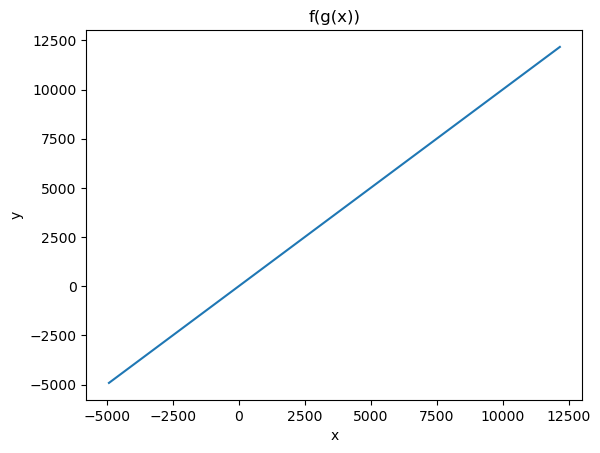

Your code PASSED all the code checks!


In [6]:
def TEST_equation_fgx():
    x = np.linspace(-10, 10, 1000)
    y = equation_fgx(x)
    
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("f(g(x))")
    plt.show()
    
    todo_check([
        ("np.isclose(y.flatten()[[0, 500, -1]], np.array([-4913., 27.544, 12167.]),rtol=0.01).all()", "y has potentially incorrect values"),
    ], **locals())
TEST_equation_fgx()

In [7]:
def derivative_fgx(x):
    """ Derivative f'(g'(x))

        Args:
            x: A NumPy array of numbers for computing deriviative output for f'(g'(x))
    """
    # TODO 1.2
    out = x
    for i in range(len(x)):
        out[i] = 3*(x[i]*2+3)**2*2
    return out

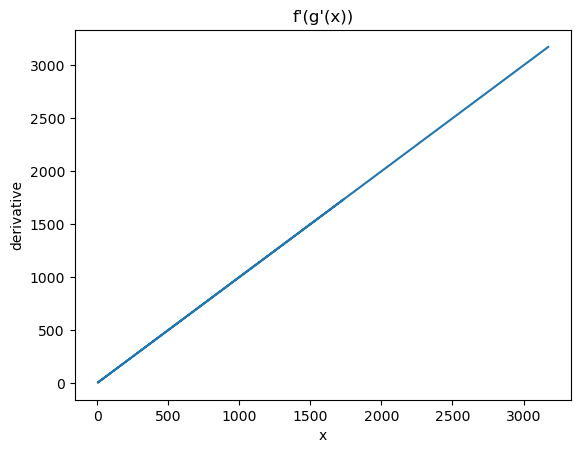

Your code PASSED all the code checks!


In [8]:
def TEST_derivative_fgx():
    x = np.linspace(-10, 10, 1000)
    y_deriv = derivative_fgx(x)
    
    plt.plot(x, y_deriv)
    plt.xlabel('x')
    plt.ylabel('derivative')
    plt.title("f'(g'(x))")
    plt.show()
    
    todo_check([
        ("np.isclose(y_deriv.flatten()[[0, 500, -1]], np.array([1734., 54.723, 3174.]),rtol=0.01).all()", "y_deriv has potentially incorrect values"),
    ], **locals())
TEST_derivative_fgx()

# Ordinary Least Squares

## California Housing Dataset
<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-datasets-images%2F24824%2F31630%2Fa5f5ce1e4b4066d1f222e79e8286f077%2Fdataset-cover.jpg%3Ft%3D2018-05-03-00-52-48&f=1&nofb=1&ipt=7360d9754c45331414cb7514bbad9b59a8fc322eaa619777267e9a92b208ee11&ipo=images"></center>


This assignment will have you tackle the famous California housing dataset, where the goal is to predict the price of a house. The California housing dataset (among other housing datasets) is a frequently used dataset when first being introduced to regression. See its [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices) page for additional details. Below is a description of the dataset given by Sklearn.

> The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).
> This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
> A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

#### TODO 2 (5 points): Data Loading
Complete the TODO by loading the California housing dataset using Sklearn.

1. Import the `fetch_california_housing` function from `sklearn.datasets`.
<br><br>
2. Load the dataset by calling the `fetch_california_housing()` function and pass the parameter the returns the data as a pandas DataFrame. Store the output into `housing`.

In [9]:
# TODO 2.1
from sklearn.datasets import fetch_california_housing
# TODO 2.2
housing = fetch_california_housing(as_frame=True)

In [10]:
todo_check([
    ("isinstance(housing, sklearn.utils.Bunch)", "'housing' is not of type Bunch"),
    ("isinstance(housing.data, pd.DataFrame)", "housing.data is not a Pandas DataFrame. Make sure to pass the correct argument to load_iris()."),
    ("isinstance(housing.target, pd.Series)", "housing.target is not a Pandas series. Make sure to pass the correct argument to load_iris()."),
])

Your code PASSED all the code checks!


Below, we have printed out the data and target values. Recall, `housing` is a Sklearn `Bunch` object.

In [11]:
housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Additionally, you can see that there are no null values that you need to take care of. More over, all the features are of type float64. 

In [12]:
housing.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Looking at the data statistics, you should see that the scales (i.e., mean and STD) of each feature are different.

In [13]:
housing.data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


The official description of the features can be accessed by printing the `DESCR` variable. Read below to better understand what each feature is, how many data samples there are, and what the target is.

In [14]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Notice, that the target name for the data is called 'MedHouseVal' (i.e., the name of the Series below) or rather the median house value. As per the description, this is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [15]:
housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

### Visualization

It is time to visualize the data to understand the features and how they relate to the target.

#### TODO 3 (10 points): Spatial Scatter Plot
Complete the TODO by creating a scatter plot of California, which plots the median house values depending on their longitude and latitude. 

1. Import Seaborn.
<br><br>
2. Concatenate the housing data and housing targets into one DataFrame. Store the output into `housing_df`.
<br><br>
3. Plot the `housing_df` using Seaborn's `scatterplot()` function so that each median house value (i.e., the target) is plotted based on its longitude (x-axis) and latitude (y-axis). Set the size and hue of the dots to be based on the target value to better visualize the data. If done correctly, the plot should look like the shape of California, where each do represents a median house value. The larger and darker the dot, the higher the value of the house.
    1. Hint: use `housing_df` as the data.
    2. Hint: See `scatterplot()` documentation to see how to set the x- and y-axis to be longitude and latitude features.
    3. Hint: See `scatterplot()` documentation to see how to set the hue and size to be based on the targets. 
<br><br>
5. Write in 3-4 sentences about what do you observe. Where are do you think the most expensive houses are located based on the plot?

In [16]:
# TODO 3.1
import seaborn as sb

# TODO 3.2
housing_df = pd.concat([housing.data, housing.target], axis=1)

display(housing_df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


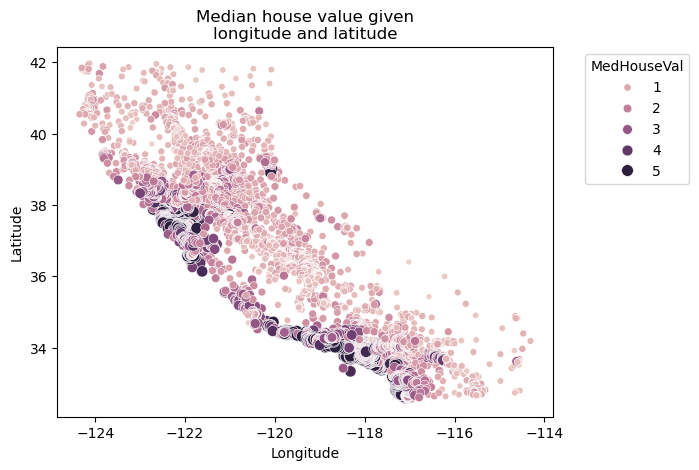

In [17]:
# TODO 3.3
sb.scatterplot(housing_df, x='Longitude', y='Latitude', hue='MedHouseVal', size='MedHouseVal')
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Median house value given\nlongitude and latitude")
plt.show()

`TODO 3.4` Write your thoughts in the below markdown cell next to the words `Answer:` 

DO NOT WRITE YOUR ANSWER IN THIS CELL!



`Answer:` The median house value increases in clusters around major cities, particularly San Fransicso and Los Angeles, and is generally high around the coast. The waters of the bay can be marked by the lack of houses in those areas and one ususual spot on the east border of the state that has an extremely high median house value. I believe it is Lake Tahoe. Assuming that each dot is a block group, the map also illustrates dramatic population density around major cities. 

#### TODO 4 (10 points): Target-Feature Scatter Matrix

Now, complete the TODO by comparing the target data 'MedHouseVal' against every feature to see if there are any linear trends.

1. Plot the comparison of the features in `housing_df` against the targets using Seaborn's `pairplot` function. However, DO NOT compare all features against all features. To do so, you will need to pass the target column name to `y_vars` and the feature column names to `x_vars`. Additionally, index `housing_df` using `indices` to randomly select 500 samples, this will speed up the plotting by sampling a subset of the dataset. Finally, if you want, color code the plot based on the targets for better interpretability.
    1. Hint: use `housing_df` as the data.
    2. Hint: Recall JUST the features are can be accessed using `housing.data.columns`.
    3. Hint: You can index `housing_df` using `.iloc()` method.
    4. Hint: Use `hue` to color code the points based on.
<br><br>
3. Write in 3-4 sentences about what you observe? Do any of the features produce linear treads with the target data?

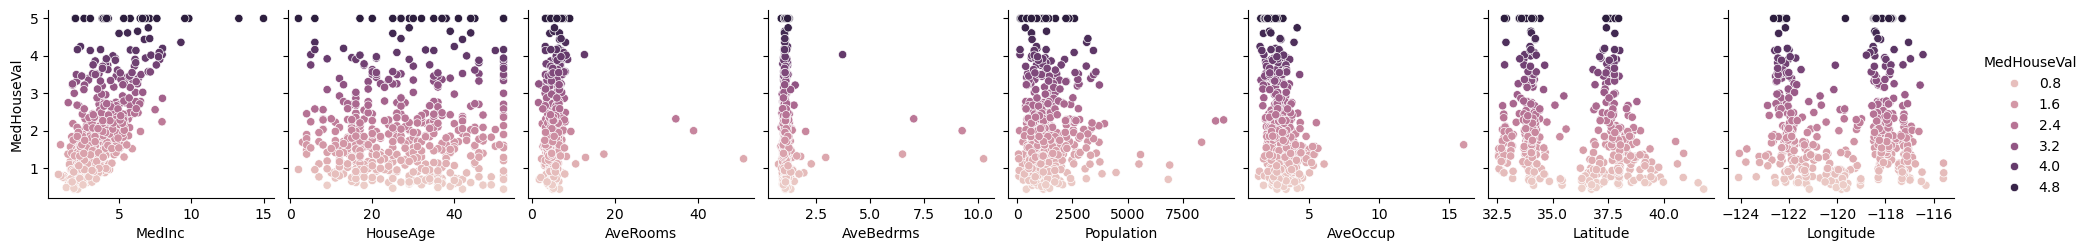

In [18]:
# Randomly select a subset of the data
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(housing_df)), size=500, replace=False)
# TODO 4.1
from seaborn import pairplot
pairplot(housing_df.iloc[indices], y_vars='MedHouseVal', x_vars=housing.data.columns, hue='MedHouseVal')
plt.show()

`TODO 4.2` Write your thoughts in the below markdown cell next to the words `Answer:` 

DO NOT WRITE YOUR ANSWER IN THIS CELL!



`Answer:` I see a mild trend between median household income and median house value, but the data clusters too heavily on the low end of the x-axis most of the time to get a good idea of the trends. 

## Data Preprocessing

### Data Splitting
The first data preprocessing step will be to split the data into train and test sets.

#### TODO 5 (5 points): Train and Test Splits

Complete the `get_train_test_data()` function by following the below TODO steps. This time you will use `train_test_split()` function from Sklearn, which will randomize the data and split it for you.

1. Import the `train_test_split` from Sklearn.
<br><br>
2. Call the `train_test_split()` function such that the train set is 80% of the data and the test set is 20% of the data. Additionally, pass a seed of 42 for the random state. Store the output into `X_trn`, `X_tst`, `y_trn`, and `y_tst`.

In [19]:
# TODO 5.1
from sklearn.model_selection import train_test_split
def get_train_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    # TODO 5.2
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_trn, y_trn, X_tst, y_tst


In [20]:
def TEST_get_train_trest_data():
    X_trn, y_trn, X_tst, y_tst = get_train_test_data(
        X=housing.data.values, 
        y=housing.target.values
    )
    print(f"X_trn shape: {X_trn.shape}")
    print(f"X_tst shape: {X_tst.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    print(f"y_tst shape: {y_tst.shape}")

    todo_check([
        ("'train_test_split' in globals()", "Sklearn train_test_split() function does not seem to be imported."),
        ("len(y_trn) == 16512", "Training data has incorrect number of data samples."),
        ("len(y_tst) == 4128", "Testing data has incorrect number of data samples."),
        ("'train_test_split' in globals()", 'train_test_split does not appear to have been imported!'),
        ("np.isclose(X_trn[10].sum(),635.2001, rtol=00.01)", "X_trn value was not correct, check implementation and random_state."),
        ("np.isclose(y_trn[10], 2.319, rtol=0.01)", "y_trn value was not correct, check implementation and random_state."),
        ("np.isclose(X_tst[15].sum(), 5539.429, rtol=0.01)", "X_tst value was not correct, check implementation and random_state."),
        ("np.isclose(y_tst[15], 1.362, rtol=0.01)", "y_tst value was not correct, check implementation and random_state."),
    ], **locals())
TEST_get_train_trest_data()

X_trn shape: (16512, 8)
X_tst shape: (4128, 8)
y_trn shape: (16512,)
y_tst shape: (4128,)
Your code PASSED all the code checks!


### Adding Bias Term

Typically, linear models embed a bias term into the features by adding a column of 1's - these are actually called affine models. The bias column allows for the least squares algorithm, and others, to create a solution that is not restricted to passing through the origin! Instead, the bias term allows the solution to shift the line of best fit up and down the y-axis.

Think of a linear function $y = mx$ or more concretely an equation like $y = 5x$. This linear function is restricted to passing through the origin, thus it can be harder to fit data. Now consider an *affine function* $y = mx + b$ or more concretely an equation like $y = 5x + 1$. This new affine function allows us to adjust the point at which the line of the best fit intersects the y-axis (the line is no longer confined to the origin). Essentially, adding the bias term is allowing for the model to be more flexible. See the below image for a visual reference!

<center><img src="https://qph.fs.quoracdn.net/main-qimg-c0bb76e8e57e9a33170c45265eadb213"></center>

#### TODO 6 (10 points): add_bias() function

Complete the following `add_bias()` function.

1. Create a 2D vector NumPy array full of 1s with the same number of data samples as in `X`. Store the output into `bias`.
<br><br>
2. Combine `bias` with the passed data `X` so that the bias column is now the first column in `X`. Return the output.
    1. Hint: Use NumPy to stack the arrays together horizontally.

In [21]:
def add_bias(X: np.ndarray) -> np.ndarray:
    # TODO 6.1
    rows, _ = X.shape
    bias = np.ones((int(rows), 1))

    # TODO 6.2
    return np.hstack((bias, X))

In [22]:
def TEST_add_bias():
    X_trn, _, _, _  = get_train_test_data(
        X=housing.data.values, 
        y=housing.target.values
    )
    X1 = add_bias(X_trn)
    print(f"X_trn with bias shape: {X1.shape}")
    todo_check([
        ("(X1[:, 0] == 1).all()", "The 1st column of `X1` does not seem to be the bias term (i.e., full of 1s)."),
    ], **locals())
TEST_add_bias()

X_trn with bias shape: (16512, 9)
Your code PASSED all the code checks!


### Putting it all together

 It is time to combine all the data preprocessing steps (data splitting and add bias) into one function which returns the fully preprocessed data.

#### TODO 7 (10 points): get_preprocessed_data function

Complete the following the `get_preprocessed_data()` function which reimplementing each data preprocessing step.

1. Call the `get_train_test_data()` function to split the data. Store the output into `X_trn`, `y_trn`, `X_tst`, and `y_tst`.
<br><br>
2. Call the `add_bias()` function to add the bias column to the training and testing data. Store the output back into `X_trn` and `X_tst`.

In [23]:
def get_preprocessed_data():
    # TODO 7.1
    X_trn, y_trn, X_tst, y_tst = get_train_test_data(X=housing.data.values, y=housing.target.values)
    
    # TODO 7.2
    X_trn = add_bias(X_trn)
    X_tst = add_bias(X_tst)
    return X_trn, y_trn, X_tst, y_tst

In [24]:
def TEST_get_preprocessed_data():
    X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()
    
    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    print(f"X_tst shape: {X_tst.shape}")
    print(f"y_tst shape: {y_tst.shape}")
    print(f"X_trn means:\n{X_trn.mean(axis=0)}")
    print(f"X_tst means:\n{X_tst.mean(axis=0)}")
    
    todo_check([
        ("len(y_trn) == 16512", "Training data has incorrect number of data samples."),
        ("len(y_tst) == 4128", "Testing data has incorrect number of data samples."),
        ("(X_trn[:, 0] == 1).all()", "The 1st column of `X_trn` does not seem to be the bias term (i.e., full of 1s)."),
        ("(X_tst[:, 0] == 1).all()", "The 1st column of `X_tst` does not seem to be the bias term (i.e., full of 1s)."),
    ], **locals())
TEST_get_preprocessed_data()

X_trn shape: (16512, 9)
y_trn shape: (16512,)
X_tst shape: (4128, 9)
y_tst shape: (4128,)
X_trn means:
[ 1.00000000e+00  3.88075426e+00  2.86082849e+01  5.43523502e+00
  1.09668475e+00  1.42645300e+03  3.09696119e+00  3.56431492e+01
 -1.19582290e+02]
X_tst means:
[ 1.00000000e+00  3.83033798e+00  2.87642926e+01  5.40405863e+00
  1.09663675e+00  1.42157171e+03  2.96543102e+00  3.55867103e+01
 -1.19519360e+02]
Your code PASSED all the code checks!


##  Metrics

Finally, you will need some sort of metrics to asess how well the ordinary least squares method is performing. To do so, you will use the sum of squared error (SSE, mean squared error (MSE), and root means squared error (RMSE).  The smaller the error, typically, the better the results! However, RMSE will the most useful as it gives the error using the original units, which in this case is $100,000 dollars. The next most use metric is MSE which indicates the average error and normalizes the data based on the number of samples passed. 

$$
\text{SSE} = \sum_{m=1}^M \Big(\hat{y}_m - y_m \Big)^2.  \tag{1}
$$

$$
\text{MSE} = \frac{1}{M}\sum_{m=1}^M \Big(\hat{y}_m- y_m \Big)^2.  \tag{2}
$$

$$
\text{RMSE}  = \sqrt{\frac{1}{M}\sum_{m=1}^M (\hat{y}_m - y_m)^2} \tag{3}
$$ 


#### TODO 8 (15 points): Coding SSE, MSE, and RMSE

Complete each of the `sse()`, `mse()`, and `rmse()` functions to complete the TODO. No for-loops are required to complete this TODO.

1. Complete the `sse()` function using the above $\text{SSE}$ equation and return the output.
<br><br>
2. Complete the `mse()` function using the above $\text{MSE}$ equation and return the output.
<br><br>
3. Complete the `rmse()` function using the above $\text{RMSE}$ equation and return the output.

**Hints**
- You may need to use `np.sum()`, `np.mean()`, and `np.sqrt()` functions. Additionally, feel free to reuse any of the function computations by calling any of the prior functions.

In [25]:
def sse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the sum of squared error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the SSE
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    # TODO 8.1
    total = np.sum((y_hat - y) ** 2)
    return total

In [26]:
def TEST_sse():
    rng = np.random.RandomState(0)
    y = rng.random((100,))
    y_hat = y + rng.normal(0, .01, 100)
    dummy_sse = sse(y=y, y_hat=y_hat)
    print(f"dummy_sse: {dummy_sse}")
    todo_check([
        ("np.isclose(dummy_sse, 0.0102976, rtol=0.001)", "dummy_mse is potentially incorrect.")
    ], **locals())
TEST_sse()

dummy_sse: 0.010297617241074742
Your code PASSED all the code checks!


In [27]:
def mse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the mean square error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the MSE
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    # TODO 8.2
    
    return (1.0/len(y)) * sse(y, y_hat)

In [28]:
def TEST_mse():
    rng = np.random.RandomState(0)
    y = rng.random((100,))
    y_hat = y + rng.normal(0, .01, 100)
    dummy_mse = mse(y=y, y_hat=y_hat)
    print(f"dummy_mse: {dummy_mse}")
    todo_check([
        ("np.isclose(dummy_mse, 0.0001029, rtol=0.001)", "dummy_mse is potentially incorrect.")
    ], **locals())
TEST_mse()

dummy_mse: 0.00010297617241074742
Your code PASSED all the code checks!


In [29]:
def rmse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Compute the root means squared error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the RMSE
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    
    # TODO 8.3
    
    return mse(y, y_hat)**.5

In [30]:
def TEST_rmse():
    rng = np.random.RandomState(0)
    y = rng.random((100,))
    y_hat = y + rng.normal(0, .01, 100)
    dummy_rmse = rmse(y=y, y_hat=y_hat)
    print(f"dummy_rmse: {dummy_rmse}")
    todo_check([
        ("np.isclose(dummy_rmse, 0.0101, rtol=0.01)", "dummy_rmse is potentially incorrect.")
    ], **locals())
TEST_rmse()

dummy_rmse: 0.010147717596127093
Your code PASSED all the code checks!


## Coding Ordinary Least Squares 

Finally, it's time to apply least squares to the data in an attempt to develop a model for predicting median house values! Recall that the least squares formula is used to generate weights $\wv$ that produce a model that best fits the training data. Recall that the "best fit" is defined by using the SSE error/cost function. Thus, the goal is to learn the weights that produce the smallest SSE or, alternatively, the smallest MSE or RMSE.

Remember, the ordinary least squares or normal equation is defined as follows:

$$
\wv = (\Xm^\top \Xm)^{-1} \Xm^\top \yv.
$$

To compute the predictions, simply take the linear combination between the data and the weights by taking the dot product between the data and weights as follows:

$$
\hat{\yv} = \Xm \wv.
$$

#### TODO 9 (20 points): OrdinaryLeastSquares Class

It is finally time to implement the KNN code. Do so by completing the below `OrdinaryLeastSquares` class. 

**`fit()` TODOs**

Follow the below steps to implement the `fit()` method. 

1. Convert the above OLS equation into code to compute the optimal weights $\wv$. Store the output into `self.w`.
    1. Hint: `X` corresponds to $X$ and `y` corresponds to $y$.
    2. Hint: Use Numpy's `@` symbol or `np.dot` to compute the dot products.
    3. Hint: Use the `.T` NumPy array variable to apply the transpose.
    4. Hint: Try using Numpy's `linalg.pinv()` to calculate the pseudo inverse.

**`predict()` TODOs**

Follow the below steps to implement the `predict()` method.

2. Convert the above linear combination equation into code to compute and return the predictions.
    1. Hint: `X` corresponds to $X$ and `self.w` corresponds to $\wv$. 

In [31]:
class OrdinaryLeastSquares():
    """ Perfroms ordinary least squares regression
    
        Attributes:
            w: The weights learned by using the normal equation
        
    """
    def __init__(self):
        self.w  = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Train OLS to learn optimal weights

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 1D vector
                
            Return:
                The class's own object reference. 
        """
        # TODO 9.1
        self.w = np.linalg.pinv(X.T @ X) @ X.T @ y
        return self.w

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix (samples x features)

            Return:
                Returns a 1D vector of predictions for each data sample in X
        """
        # Prediction: y_hat = X * w
        return X @ self.w

**Note, the below TODO check will ONLY work if `random_state` for the `train_test_split()` function was set to 42!**

In [32]:
# Get preprocessed data
X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()
# Initialize OrdinaryLeastSquares object
ols = OrdinaryLeastSquares()
# Train OLS
ols.fit(X_trn, y_trn)
# Compute test predictions
y_tst_hat = ols.predict(X_tst) 

In [33]:
todo_check([
    ("np.isclose(ols.w.sum(), -36.762085, rtol=0.001)", "ols.w has potentially incorrect values, check implementation and random_state."),
    ("np.isclose(y_tst_hat[[0, 2000, -1]], np.array([0.7191, 2.0046, 2.0094]), rtol=0.01).all()", "y_hat has potentially incorrect values, check implementation and random_state.")
])

Your code PASSED all the code checks!


Below is a plot to compare the targets and the predictions. Notice, this graph is not super useful. You might gain more insights by looking at the different metrics instead!

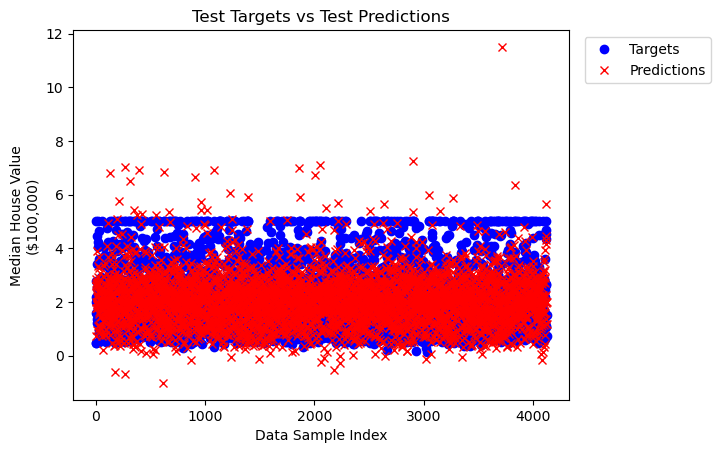

In [34]:
# Plot targets and predictions
plt.plot(y_tst, 'ob', label='Targets')
plt.plot(y_tst_hat, 'xr', label='Predictions')
plt.xlabel("Data Sample Index")
plt.ylabel("Median House Value\n($100,000)")
plt.title("Test Targets vs Test Predictions")
plt.legend()
plt.legend(bbox_to_anchor=(1.3, 1.00))
plt.show()

Due to the low number of features, it is possible to observer the learned weight values (as seen below). However, since each feature is operating on a different scale, it is hard to draw any meaningful conclusions from these values. Only when all features are operating on the same scale can you begin to associate some sort of meaning to the value of the weights.

In [35]:
pd.Series(ols.w, index=['bias'] + list(housing.data.columns))

bias         -37.023278
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708
dtype: float64

#### TODO 10 (5 points): Evaluation
Compute the test $\text{SSE}$, $\text{MSE}$, and $\text{RMSE}$ to complete this TODO.

1. Compute test $\text{SSE}$ using the `sse()` function with the test predictions and test targets. Store the output into `test_sse`.
<br><br>
2. Compute test $\text{MSE}$ using the `mse()` function with the test predictions and test targets. Store the output into `test_mse`.
<br><br>
3. Compute test $\text{RMSE}$ using the `rmse()` function with the test predictions and test targets. Store the output into `test_rmse`.

In [36]:
# TODO 10.1
tst_sse = sse(y_tst, y_tst_hat)

# TODO 10.2
tst_mse = mse(y_tst, y_tst_hat)

# TODO 10.3
tst_rmse = rmse(y_tst, y_tst_hat)

print(f"Test SSE: {tst_sse}")
print(f"Test MSE: {tst_mse}")
print(f"Test RMSE: {tst_rmse}")
print(f"Test RMSE scalled by $100,000 dollars: {tst_rmse * 100000}")

Test SSE: 2294.7205195293113
Test MSE: 0.5558915987231858
Test RMSE: 0.7455813830315144
Test RMSE scalled by $100,000 dollars: 74558.13830315144


In [37]:
todo_check([
    ("np.isclose(tst_sse, 2294.7205194, rtol=0.01)", "tst_sse is potentially incorrect."),
    ("np.isclose(tst_mse, 0.5558915, rtol=0.01)", "tst_mse is potentially incorrect."),
    ("np.isclose(tst_rmse, 0.74558138, rtol=0.01)", "tst_rmse is potentially incorrect."),
])

Your code PASSED all the code checks!
